# **Covariance Matrix**
Es usualmente el primer paso de reducción de dimensionalidad porque nos da una idea del número de características que  son independientes y las que son fuertemente relacioandas (y por consiguiente, el número de características que
Usted puede descartar)

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

# Normalized covariance matrix :  The relationship between the correlation coefficient matrix: R
# and the covariance matrix, C, is Rij = Cij /[ (Cii * Cjj) ** 1/2 ]

cov_data = np.corrcoef(iris.data, rowvar=False)

print(iris.feature_names)
print(cov_data)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]


In [3]:
''' usar matriz de covarianza para comprobar corrcoef() es
 la noramlizacion de la matriz de covarianza '''

# matriz de covarianza donde Cii es la varianza muestral
cov = np.cov(iris.data, rowvar=False)
print(cov)
print('R[0][1] = ', cov[0][1] / ((cov[0][0] * cov[1][1]) ** 0.5),
      '\nSe comprueba en la matriz de coef que es: ', cov_data[0][1])


[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
R[0][1] =  -0.11756978413300198 
Se comprueba en la matriz de coef que es:  -0.117569784133002


**Es importante notar como la matriz de covarianza posee la varianza muestral = S^2 en su diagonal**

<AxesSubplot:>

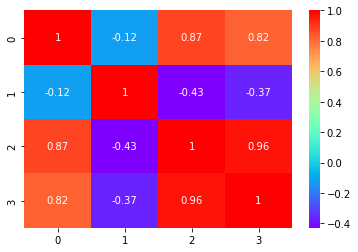

In [4]:
# Using a heat map, let's visualize the covariance matrix in a graphical form:
import matplotlib.pyplot as plt
import seaborn as sns

'''todo esto que hacemos en matplotlib es equivalente a un solo comando de seaborn'''
# img = plt.matshow(cov_data, cmap=plt.cm.rainbow)
# plt.colorbar(img, ticks=[-1, 0, 1], fraction=0.050)

# for x in range(cov_data.shape[0]):
#     for y in range(cov_data.shape[1]):
#         plt.text(x, y, "%0.2f" % cov_data[x, y], size=12, color='black', ha="center", va="center")
# plt.show()

cmaps = ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10',
         'tab20', 'tab20b', 'tab20c', 'flag', 'prism', 'ocean', 'gist_earth', 'terrain',
         'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'gist_rainbow',
         'rainbow', 'jet', 'nipy_spectral', 'gist_ncar', 'Purples', 'Blues']

sns.heatmap(cov_data, vmin=cov_data.min(), vmax=1, cmap='rainbow', annot=True)


Podemos comprobar visualmente la alta relacion entre la primera y la 3era: la primera y la 4ta así como la 3era y la 4ta. Además podemos comprobar que solo el 2do rasgo es casi independiente de los demas. POr lo tanto podemos reducir todo a dos caracterisiticas. 

# **PCA-Principal component analysis**


Dimensiones:  (150, 2)  con info o varianza acumulada de:  0.977685206318795


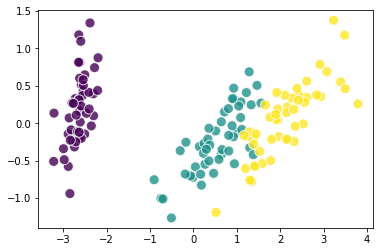

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# escogemos dos pq ya sabiamos el numero aproximado de caracteristicas relacionadas

# si no sabemos el # de caract. relacionadas podemos pasarle como parametro el
# % que queremos acumular de varianza, por ejemplo n_components=0.95
pca_2c = PCA(n_components=2)
X_pca_2c = pca_2c.fit_transform(iris.data)
print('Dimensiones: ', X_pca_2c.shape, ' con info o varianza acumulada de: ',
      pca_2c.explained_variance_ratio_.sum())

plt.scatter(X_pca_2c[:, 0], X_pca_2c[:, 1], c=iris.target,
            alpha=0.8, s=100,                 # trasparencia y grosor
            marker='o', edgecolors='white')  # forma y colordeArista
plt.show()


In [6]:
'''la matriz de transformacion lineal'''
pca_2c.components_


array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

A veces, PCA no es lo suficientemente eficaz, especialmente cuando se trata de datos de **alta dimensionalidad**, ya que las **características pueden estar muy correlacionadas** y,**al mismo tiempo, la varianza está desequilibrada**. Una posible solución para esta situación es intentar **blanquear** la señal (o hacerla más esférica). En este caso, los vectores propios son forzados a varianzas unitarias de los componentes *(multiplicando los components_vectores por la raíz cuadrada de n_samples y luego se dividen por los valores singulares para garantizar resultados no correlacionadoson varianzas de componentes unitarios )*. **Whitening** elimina información,pero a veces mejora la precisión de los algoritmos de aprendizaje automático que se utilizarán después de la reducción del PCA.


Dimensiones:  (150, 2)  con info o varianza acumulada de:  0.977685206318795


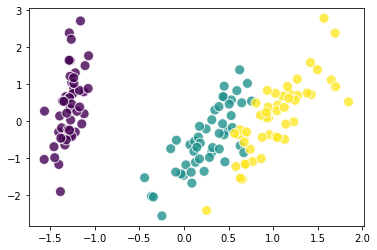

In [7]:
# Solo tenemos que añadir el parametro correspondiente
pca_2c = PCA(n_components=2, whiten=True)
X_pca_2c = pca_2c.fit_transform(iris.data)

print('Dimensiones: ', X_pca_2c.shape, ' con info o varianza acumulada de: ',
      pca_2c.explained_variance_ratio_.sum())

plt.scatter(X_pca_2c[:, 0], X_pca_2c[:, 1], c=iris.target,
            alpha=0.8, s=100,                 # trasparencia y grosor
            marker='o', edgecolors='white')  # forma y colordeArista
plt.show()


## **PCA for big data – RandomizedPCA**

El principal problema del PCA es la complejidad del algoritmo de **descomposición de valores singulares subyacente (SVD)** que realiza el trabajo de reducción. Hay un algoritmo más rápido basado en la SVD aleatoria *(método de donde la reconstrucción de rango completo no es perfecta, y los vectores base se optimizan localmente durante cada iteración,pero sólo requiere unos pocos pasos para obtener una buena aproximación)*. Es una gran elección si el conjunto de datos de entrenamiento es grande ya que los resultados varían significativamente cuando el algoritmo se aplica a conjuntos de datos grandes.

Dimensiones:  (150, 2)  con info o varianza acumulada de:  0.9776852063187954


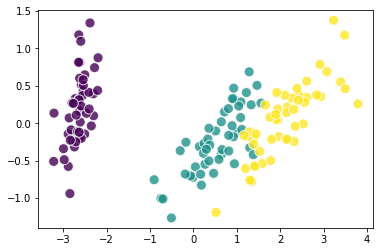

In [8]:
# Solo tenemos que añadir el algoritmo a utilizar
pca_2c = PCA(n_components=2, svd_solver='randomized')
X_pca_2c = pca_2c.fit_transform(iris.data)

print('Dimensiones: ', X_pca_2c.shape, ' con info o varianza acumulada de: ',
      pca_2c.explained_variance_ratio_.sum())

plt.scatter(X_pca_2c[:, 0], X_pca_2c[:, 1], c=iris.target,
            alpha=0.8, s=100,                 # trasparencia y grosor
            marker='o', edgecolors='white')  # forma y colordeArista
plt.show()


>En estecódigo, se aplicó SVD-randomized al conjunto de datos de Iris. El resultado es bastante parecido al PCA clásico ya que el tamaño del problema es muy pequeño.

# **Latent factor analysis(LFA)**
O simplemente **Factor Analysis** es un modelos no supervizado similar al PCA pero no hay descomposición ortogonal. Se emplea bajo la hipótesis que *las caracteristicas son observaciones de variables que se derivan o estan influenciadas por un factor latente(que no se mide directamente)*


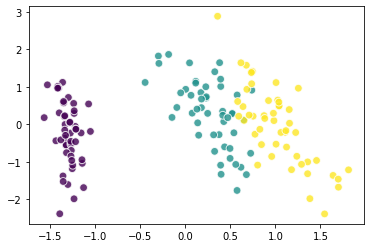

In [14]:
from sklearn.decomposition import FactorAnalysis

# asumiendo que ahy dos factores representados en el sistema
fact_2c = FactorAnalysis(n_components=2)
X_factor = fact_2c.fit_transform(iris.data)
plt.scatter(X_factor[:, 0], X_factor[:, 1],
            c=iris.target, alpha=0.8, s=60,
            marker='o', edgecolors='white')
plt.show()


# **Linear discriminant analysis(LDA)**

LinearDiscriminantAnalysis se puede usar para realizar una **reducción de dimensionalidad supervisada**, al proyectar los datos de entrada a un subespacio lineal que consiste en las direcciones que maximizan la separación entre clases. La dimensión de la salida es necesariamente menor que el número de clases, por lo que, en general, se trata de una reducción de dimensionalidad bastante fuerte y solo tiene sentido en un entorno multiclase.

Esto se implementa en el método *transform*. La dimensionalidad deseada se puede configurar   el *n_components*. Este parámetro no influye en los métodos *.fit* y *.predict*

No se adapta tan bien grandes conjuntos de datos pero vale la pena probarlo pq podria darnos mejores resultados que modelos como la regresión logística

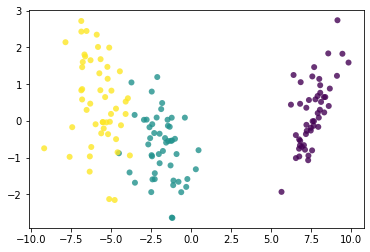

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_2c = LinearDiscriminantAnalysis(n_components=2)
X_lda_2c = lda_2c.fit_transform(iris.data, iris.target)
plt.scatter(X_lda_2c[:, 0], X_lda_2c[:, 1],
            c=iris.target, alpha=0.8, edgecolors='none')
plt.show()


# **Latent semantical analysis- LSA (TruncatedSVD)**

Este transformador realiza una reducción de la dimensionalidad lineal mediante descomposición en valores singulares truncados (SVD). A diferencia de PCA, este estimador no centra los datos antes de calcular la descomposición en valores singulares. Esto significa que puede trabajar con *sparse matrix* de manera eficiente.

En particular, SVD truncado funciona en matrices de recuento de términos/tf-idf tal como las devuelven *los vectorizadores en sklearn.feature_extraction.text*. **En ese contexto, se conoce como análisis semántico latente (LSA)**.

In [63]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
import numpy as np

categories = ['sci.med', 'sci.space']
twenty_sci_news = fetch_20newsgroups(categories=categories)
tf_vect = TfidfVectorizer()
word_freq = tf_vect.fit_transform(twenty_sci_news.data)

tsvd_2c = TruncatedSVD(n_components=50)
arr_comp = tsvd_2c.fit_transform(word_freq)
arr_comp.shape

(1187, 50)

# **Kernel PCA**
Es una extension del **PCA** donde mediante de kernels se mapea la señal (no lineablemente separable) en una proyeccion real de un subespacio linal 

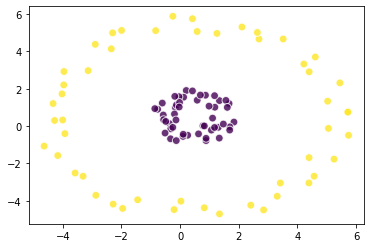

100 2


In [91]:
def circular_points(radius, N):
    '''calcular los puntos [cateto_adyacente, cateto_opuesto] que 
    estan en la circunferencia de radio @radious '''

    return np.array([[np.cos(2*np.pi*t/N)*radius,
                      np.sin(2*np.pi*t/N)*radius] for t in range(N)])


N_points = 50
N_points = 50
fake_circular_data = np.vstack([circular_points(1.0, N_points),
                                circular_points(5.0, N_points)])

# sumarle la una variable aleatoria con distribucion uniforme [0 ,1] con las mismas dimensiones
fake_circular_data += np.random.rand(*fake_circular_data.shape)

# crear la variable objetivo, en este caso a cual circunferencia pertenece el punto
fake_circular_target = np.array([0]*N_points + [1]*N_points)

plt.scatter(fake_circular_data[:, 0], fake_circular_data[:, 1],
            c=fake_circular_target, alpha=0.8,
            s=60, marker='o', edgecolors='white')
plt.show()
print(*fake_circular_data.shape)


Como vemos el conjunto de datos tiene clases en forma de circunferencia y por lo tanto no se conseguira separar los puntos amarillos de los violetas.

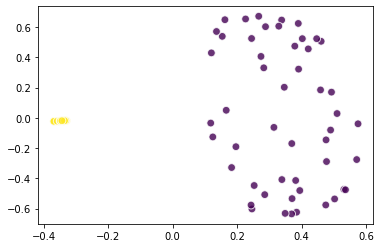

In [102]:
from sklearn.decomposition import KernelPCA, PCA
kpca_2c = KernelPCA(n_components=2, kernel='rbf')

X_kpca_2c = kpca_2c.fit_transform(fake_circular_data)

plt.scatter(X_kpca_2c[:, 0], X_kpca_2c[:, 1], c=fake_circular_target,
            alpha=0.8, s=60, marker='o', edgecolors='white')
plt.show()


# **T-Distributed Stochastic Neighbor Embedding (T-SNE)**
Es una reducción de dimensionalidad no lineal adecuada para *incrustar datos de alta dimensión para su visualización* en un *espacio de baja dimensión de dos o tres dimensiones(aprovechar al máximo el gáfico de scratter).* Específicamente, modela cada objeto de alta dimensión por un punto de dos o tres dimensiones de tal manera que *los objetos similares son modelados por puntos cercanos y los objetos diferentes son modelados por puntos distantes con alta probabilidad.*

c:\Users\Manue!_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Manue!_PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


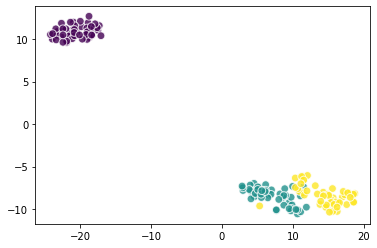

In [106]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target
X_tsne = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, alpha=0.8,
            s=60, marker='o', edgecolors='white')
plt.show()


# **Restricted Boltzmann Machine(RBM)**


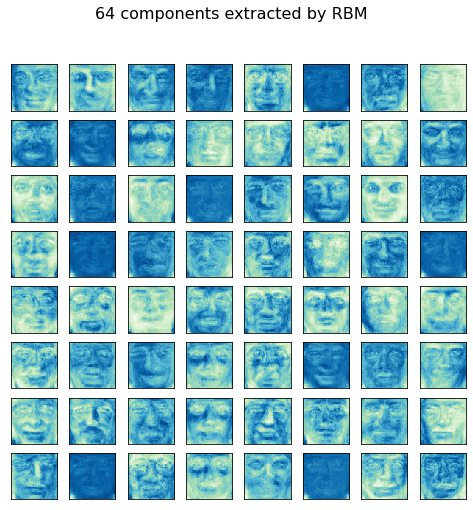

In [13]:
from sklearn import preprocessing
from sklearn.neural_network import BernoulliRBM
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

n_components = 64  # Try with 64, 100, 144
olivetti_faces = datasets.fetch_olivetti_faces()


X = preprocessing.binarize(preprocessing.scale(olivetti_faces.data.astype(float)), threshold=0.5)

rbm = BernoulliRBM(n_components=n_components, learning_rate=0.01,
                   n_iter=100)
rbm.fit(X)
plt.figure(figsize=(8.2, 8))
for i, comp in enumerate(rbm.components_):
    plt.subplot(int(np.sqrt(n_components+1)),
                int(np.sqrt(n_components+1)), i + 1)
    plt.imshow(comp.reshape((64, 64)), cmap=plt.cm.GnBu_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())

plt.suptitle(str(n_components) + ' components extracted by RBM',
             fontsize=16)
# plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.show()
